<a href="https://colab.research.google.com/github/tanviagwl98/ML_queries/blob/master/LannetTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [66]:
import io
data = pd.read_csv(io.BytesIO(uploaded['housing.csv']))


In [67]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


In [68]:
data.head(141)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200
...,...,...,...,...
136,5.942,16.90,21.2,365400
137,6.454,14.59,21.2,359100
138,5.857,21.32,21.2,279300
139,6.151,18.46,21.2,373800


In [ ]:
data.describe()

**Finidng all the important statistics for the given dataset**

In [74]:
y = data['MEDV']
min_price = np.mean(y)
print(min_price)
max_price = np.max(y)
print(max_price)
mean_y = np.mean(y)
print(mean_y)
median_price = np.median(y)
print(median_price)
std_price = np.std(y)
print(std_price)

454342.9447852761
1024800
454342.9447852761
438900.0
165171.13154429477


**Query 1** - Removal of outliers

**Detecting outliers using boxplot as it is one of the most convenient of the visualizations to detect outliers.**

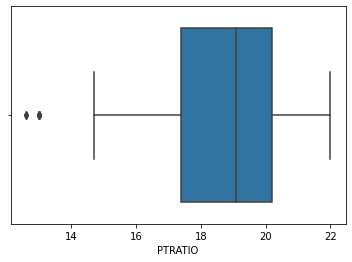

In [95]:
#detecting outliers using boxplot
import seaborn as sns
sns.boxplot(x=data['PTRATIO'])

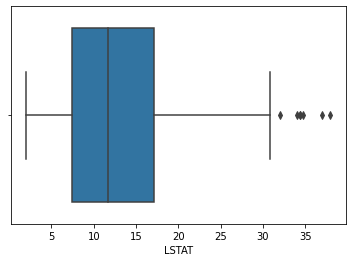

In [96]:
sns.boxplot(x=data['LSTAT'])

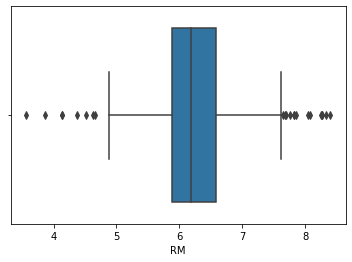

In [97]:
sns.boxplot(x=data['RM'])

**Since now we know where are outliers we need to remove them so working with z-score**

In [98]:
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)
print("\n")

threshold = 3
print(np.where(z > 3))
print("\n")


print(z[141][1])
print("\n")

data_wo = data[(z < 3).all(axis=1)]

[[0.52055395 1.1250769  1.5250831  0.30064004]
 [0.28104837 0.53706982 0.33974768 0.00449803]
 [1.46924486 1.25935736 0.33974768 1.66104726]
 ...
 [1.14420158 1.03178731 1.17748167 0.28792595]
 [0.86114953 0.91305511 1.17748167 0.04635831]
 [0.32704695 0.71516812 1.17748167 1.23776439]]


(array([141, 197, 217, 220, 224, 225, 225, 245, 253, 253, 270, 272, 353,
       355, 356, 357, 357, 389, 395, 397]), array([1, 3, 0, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 0, 1, 0, 1, 0, 1, 1]))


3.0347904767118865




**Shape of actual dataset, with outliers**

In [99]:
data.shape

(489, 4)

**Shape of dataset, without outliers.**

In [100]:
data_wo.shape

(472, 4)

**Removed 17 rows from from the original dataset.**


**Query 3** - Dropping columns with Perason co-efficient greater than 0.85.

In [101]:
co_var = data_wo.corr().abs() 
threshold = 0.85
upper = co_var.where(np.triu(np.ones(co_var.shape), k=1).astype(np.bool))

In [102]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]


In [103]:
data_wo.drop(data[to_drop], axis=1)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200
...,...,...,...,...
484,6.593,9.67,21.0,470400
485,6.120,9.08,21.0,432600
486,6.976,5.64,21.0,501900
487,6.794,6.48,21.0,462000


**Query 2** -  Adding new columns which are the results of difference between two date columns

**Since my dataset didn't contain date column so I added three date columns of my own and performed this query.**

In [110]:
from datetime import datetime  
from datetime import timedelta  

Date = "1/10/13"
data_wo['date'] = datetime.strptime(Date, "%m/%d/%y")
data_wo[:472]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,RM,LSTAT,PTRATIO,MEDV,date,date2,date3,date - date2 (abs),date2 - date3 (abs),date3 - date (abs)
0,6.575,4.98,15.3,504000,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
1,6.421,9.14,17.8,453600,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
2,7.185,4.03,17.8,728700,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
3,6.998,2.94,18.7,701400,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
4,7.147,5.33,18.7,760200,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
...,...,...,...,...,...,...,...,...,...,...
484,6.593,9.67,21.0,470400,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
485,6.120,9.08,21.0,432600,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
486,6.976,5.64,21.0,501900,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
487,6.794,6.48,21.0,462000,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days


In [111]:
Date2 = "5/10/15"
data_wo['date2'] = datetime.strptime(Date2, "%m/%d/%y") 
data_wo[:472]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,RM,LSTAT,PTRATIO,MEDV,date,date2,date3,date - date2 (abs),date2 - date3 (abs),date3 - date (abs)
0,6.575,4.98,15.3,504000,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
1,6.421,9.14,17.8,453600,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
2,7.185,4.03,17.8,728700,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
3,6.998,2.94,18.7,701400,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
4,7.147,5.33,18.7,760200,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
...,...,...,...,...,...,...,...,...,...,...
484,6.593,9.67,21.0,470400,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
485,6.120,9.08,21.0,432600,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
486,6.976,5.64,21.0,501900,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
487,6.794,6.48,21.0,462000,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days


In [112]:
StartDate = "10/10/20"

data_wo['date3'] = datetime.strptime(StartDate, "%m/%d/%y")
data_wo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,RM,LSTAT,PTRATIO,MEDV,date,date2,date3,date - date2 (abs),date2 - date3 (abs),date3 - date (abs)
0,6.575,4.98,15.3,504000,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
1,6.421,9.14,17.8,453600,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
2,7.185,4.03,17.8,728700,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
3,6.998,2.94,18.7,701400,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
4,7.147,5.33,18.7,760200,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
...,...,...,...,...,...,...,...,...,...,...
484,6.593,9.67,21.0,470400,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
485,6.120,9.08,21.0,432600,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
486,6.976,5.64,21.0,501900,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
487,6.794,6.48,21.0,462000,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days


In [113]:
data_wo['date - date2 (abs)'] = abs(data_wo['date'] - data_wo['date2'])
data_wo



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RM,LSTAT,PTRATIO,MEDV,date,date2,date3,date - date2 (abs),date2 - date3 (abs),date3 - date (abs)
0,6.575,4.98,15.3,504000,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
1,6.421,9.14,17.8,453600,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
2,7.185,4.03,17.8,728700,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
3,6.998,2.94,18.7,701400,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
4,7.147,5.33,18.7,760200,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
...,...,...,...,...,...,...,...,...,...,...
484,6.593,9.67,21.0,470400,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
485,6.120,9.08,21.0,432600,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
486,6.976,5.64,21.0,501900,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
487,6.794,6.48,21.0,462000,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days


In [114]:
data_wo['date2 - date3 (abs)'] = abs(data_wo['date2'] - data_wo['date3'])
data_wo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RM,LSTAT,PTRATIO,MEDV,date,date2,date3,date - date2 (abs),date2 - date3 (abs),date3 - date (abs)
0,6.575,4.98,15.3,504000,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
1,6.421,9.14,17.8,453600,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
2,7.185,4.03,17.8,728700,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
3,6.998,2.94,18.7,701400,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
4,7.147,5.33,18.7,760200,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
...,...,...,...,...,...,...,...,...,...,...
484,6.593,9.67,21.0,470400,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
485,6.120,9.08,21.0,432600,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
486,6.976,5.64,21.0,501900,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
487,6.794,6.48,21.0,462000,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days


In [115]:
data_wo['date3 - date (abs)'] = abs(data_wo['date3'] - data_wo['date'])
data_wo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RM,LSTAT,PTRATIO,MEDV,date,date2,date3,date - date2 (abs),date2 - date3 (abs),date3 - date (abs)
0,6.575,4.98,15.3,504000,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
1,6.421,9.14,17.8,453600,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
2,7.185,4.03,17.8,728700,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
3,6.998,2.94,18.7,701400,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
4,7.147,5.33,18.7,760200,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
...,...,...,...,...,...,...,...,...,...,...
484,6.593,9.67,21.0,470400,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
485,6.120,9.08,21.0,432600,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
486,6.976,5.64,21.0,501900,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
487,6.794,6.48,21.0,462000,2013-01-10,2015-05-10,2020-10-10,850 days,1980 days,2830 days
